In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [8]:
# Load dataset
dataset = pd.read_csv('brain tumor.csv')

In [9]:
dataset.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [11]:
dataset.shape

(3762, 15)

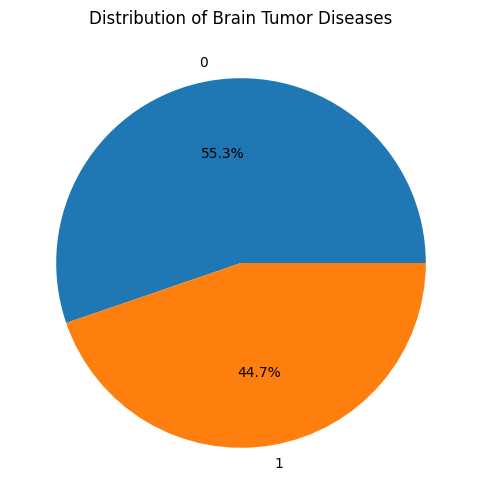

In [12]:
# Visualize data using a pie chart
label_counts = dataset['Class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Brain Tumor Diseases')
plt.show()

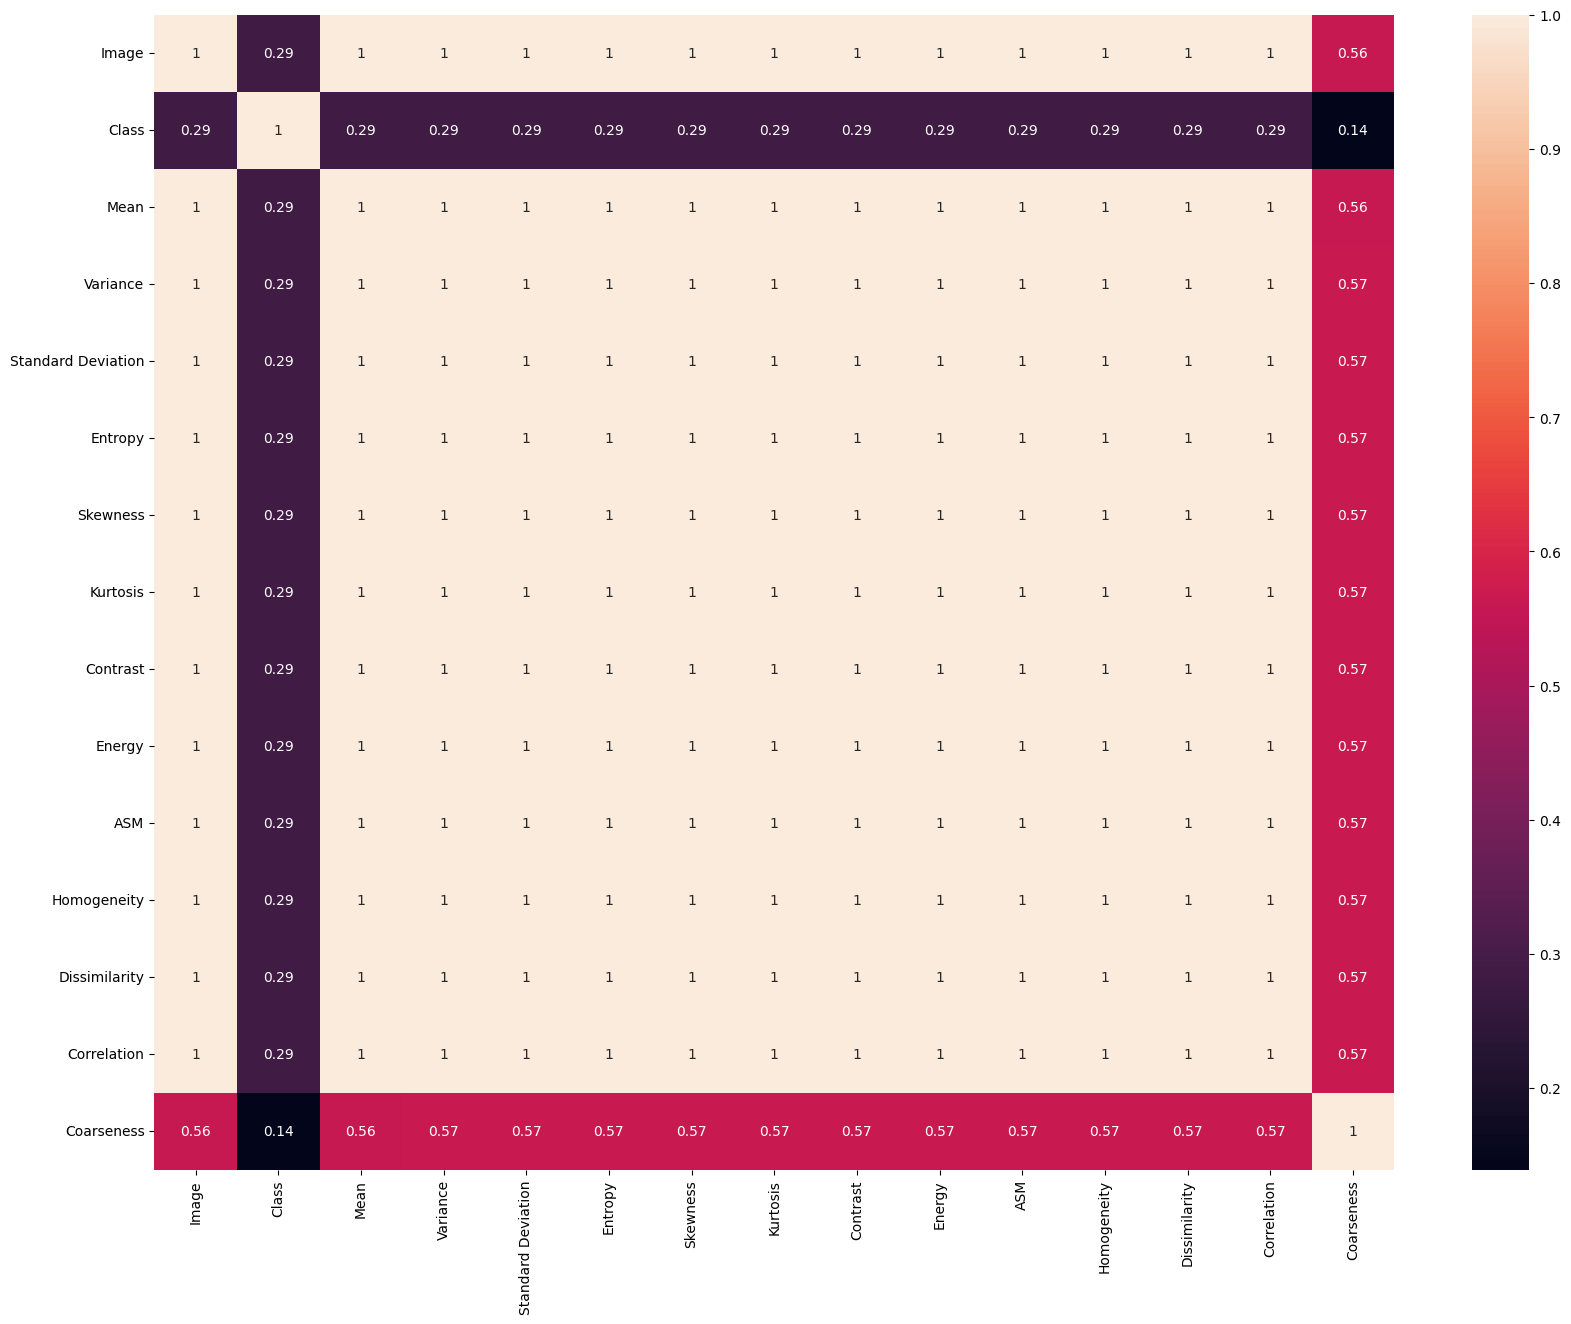

In [13]:
# Plot Feature Correlation
plt.figure(figsize=(20,15))
sns.heatmap(data=dataset.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot=True)
plt.show()

DATA CLEANING

In [14]:
dataset.drop('Image', axis=1, inplace=True)

In [15]:
dataset.isna().any()

Class                 False
Mean                  False
Variance              False
Standard Deviation    False
Entropy               False
Skewness              False
Kurtosis              False
Contrast              False
Energy                False
ASM                   False
Homogeneity           False
Dissimilarity         False
Correlation           False
Coarseness            False
dtype: bool

In [16]:
dataset.duplicated().any()

True

In [17]:
dataset = dataset.drop_duplicates()

In [18]:
dataset.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


MODELLING

In [19]:
# Separate features (X) and label (y)
X = dataset.drop('Class', axis=1)
y = dataset['Class']

FEATURE SELECTION

In [20]:
# Perform feature selection with PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_pca.shape

(3699, 6)

In [23]:
# Train Decision Tree Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Data Predict
y_pred = clf.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 98.38%


METRICS & EVALUATION

In [24]:
confusion_matrix(y_test, y_pred)

array([[405,   6],
       [  6, 323]], dtype=int64)

In [25]:
precision_score(y_test, y_pred)

0.9817629179331308

In [26]:
recall_score(y_test, y_pred)

0.9817629179331308

In [27]:
f1_score(y_test, y_pred)

0.9817629179331308